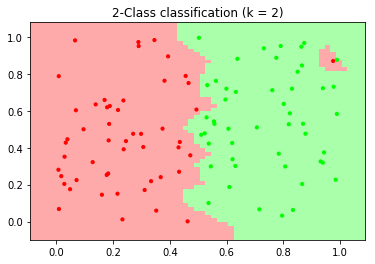

In [1]:
import matplotlib
%matplotlib inline
#matplotlib.use('GTKAgg')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

np.random.seed(8)
X = np.random.random(size=(100, 2))
y = X[:, 0] > 0.5
corrupted = np.random.choice(100, size=1)
y[corrupted] = 1 - y[corrupted]
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=10)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.show()


In [2]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(neighbors.KNeighborsClassifier(2, weights='distance'), n_estimators=100, random_state=42)
clf.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

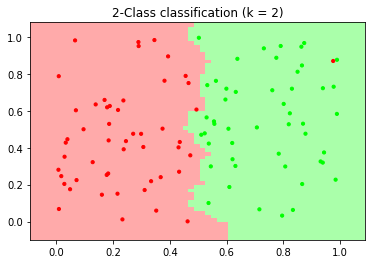

In [3]:
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=10)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split()
df = df.replace('?', np.nan)
df = df.dropna()

df['salary'] = df['salary'].apply((lambda x: x==' >50K'))
numeric_data = df[df.columns[numeric_indices]]
categorial_data = df[df.columns[categorical_indices]]
dummy_features = pd.get_dummies(categorial_data)

X = pd.concat([numeric_data, dummy_features], axis=1)
y = df['salary']

In [6]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
from sklearn.tree import export_graphviz

print(export_graphviz(clf, feature_names=X.columns))

digraph Tree {
node [shape=box] ;
0 [label="marital-status_ Married-civ-spouse <= 0.5\ngini = 0.366\nsamples = 32560\nvalue = [24719, 7841]"] ;
1 [label="capital-gain <= 7073.5\ngini = 0.122\nsamples = 17584\nvalue = [16435, 1149]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="educ-num <= 12.5\ngini = 0.093\nsamples = 17273\nvalue = [16424, 849]"] ;
1 -> 2 ;
3 [label="gini = 0.048\nsamples = 13864\nvalue = [13522, 342]"] ;
2 -> 3 ;
4 [label="gini = 0.253\nsamples = 3409\nvalue = [2902, 507]"] ;
2 -> 4 ;
5 [label="age <= 20.5\ngini = 0.068\nsamples = 311\nvalue = [11, 300]"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.045\nsamples = 307\nvalue = [7, 300]"] ;
5 -> 7 ;
8 [label="educ-num <= 12.5\ngini = 0.494\nsamples = 14976\nvalue = [8284, 6692]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="capital-gain <= 5095.5\ngini = 0.443\nsamples = 10507\nvalue = [7029, 3478]"] ;
8 -> 9 ;


In [ ]:
# Этот текст можно визуализировать на сайте webgraphviz.com